This notebook covers M343 Book 2, Part 2: Modelling events in time.

In [1]:
import poissonprocesses as pp
import numpy as np
from seaborn import objects as so

In [2]:
%load_ext watermark
%watermark -iv

numpy           : 1.23.3
seaborn         : 0.12.1
poissonprocesses: 0.3



In [3]:
%precision 4

'%.4f'

## Functions

Convencience function for plotting the models.

`plot_n_events(ne: rv_discrete, step: int = 1) -> so.Plot`

In [4]:
#| code-fold: true
def plot_n_events(nt, step=1) -> so.Plot:
    """Plot the approximated probability distribution of N(t),
    the number of events in time.

    Pass step to reduce the number of events plotted, if the returned
    plot is cluttered.
    """
    ns = np.arange(nt.ppf(0.01), nt.ppf(0.99), dtype=int, step=step)
    return (
        so.Plot(x=ns, y=nt.pmf(ns))
        .add(so.Bar())
        .label(x='n', y='p(n)', title='Probability distribution')
    )

`plot_waiting_time(wt: rv_continuous) -> so.Plot`

In [5]:
#| code-fold: true
def plot_waiting_time(wt) -> so.Plot:
    """Plot the approximate probability distribution of T, the waiting
    time between events.
    """
    ts = np.linspace(wt.ppf(0.01), wt.ppf(0.99), num=50)
    return(
        so.Plot(x=ts, y=wt.pdf(ts))
        .add(so.Line())
        .label(x='t', y='f(t)', title='Probability distribution')
    )

## The Poisson process

### 1. Nerve impulses

*M343 Book 2, Activity 3.1*

Initialise *impulses*, `Events`, a Poisson process model for the occurrence of nerve impulses.

In [6]:
impulses = pp.Events(458)  # per second
print(impulses)

Events(rate=458)


Plot the models for $N(t)$, the *number of events in time*, and $T$, the *time between events*.

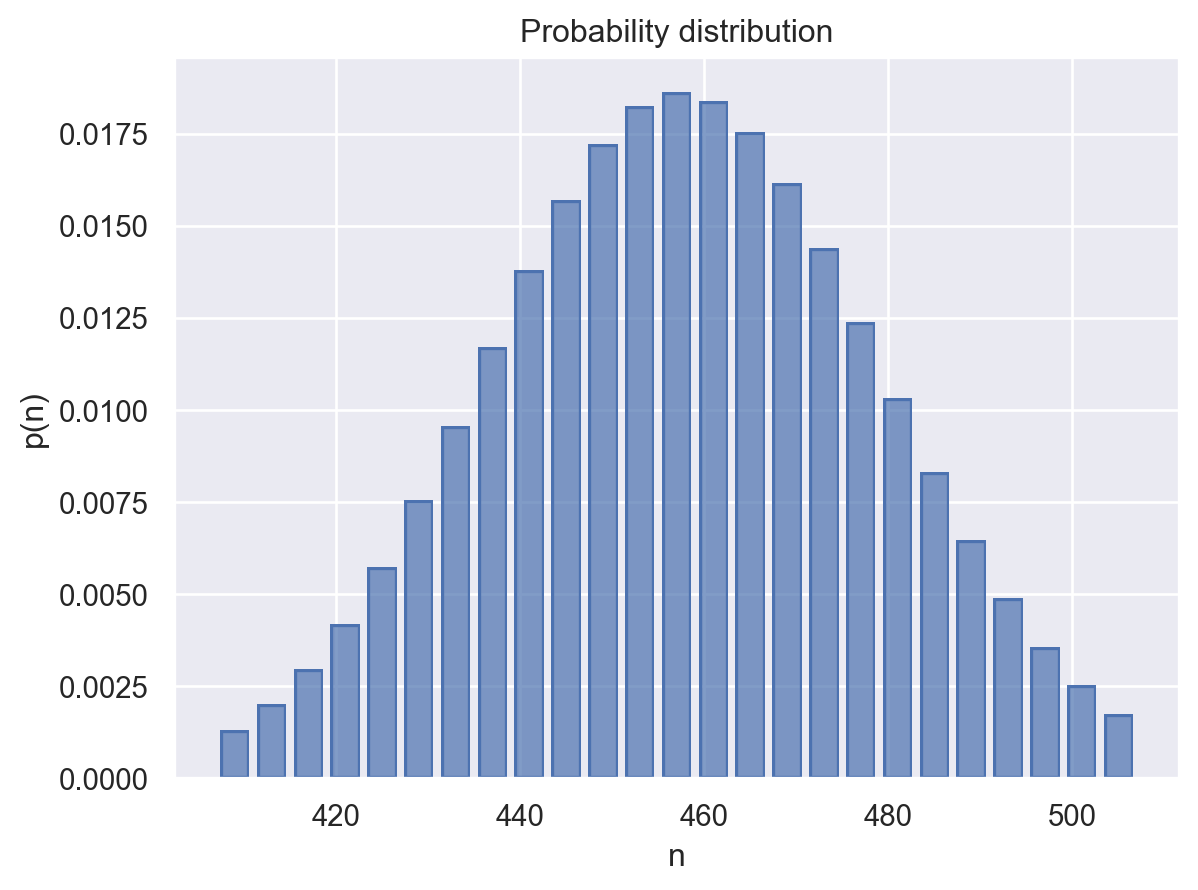

In [7]:
plot_n_events(impulses.n_events(), step=4)

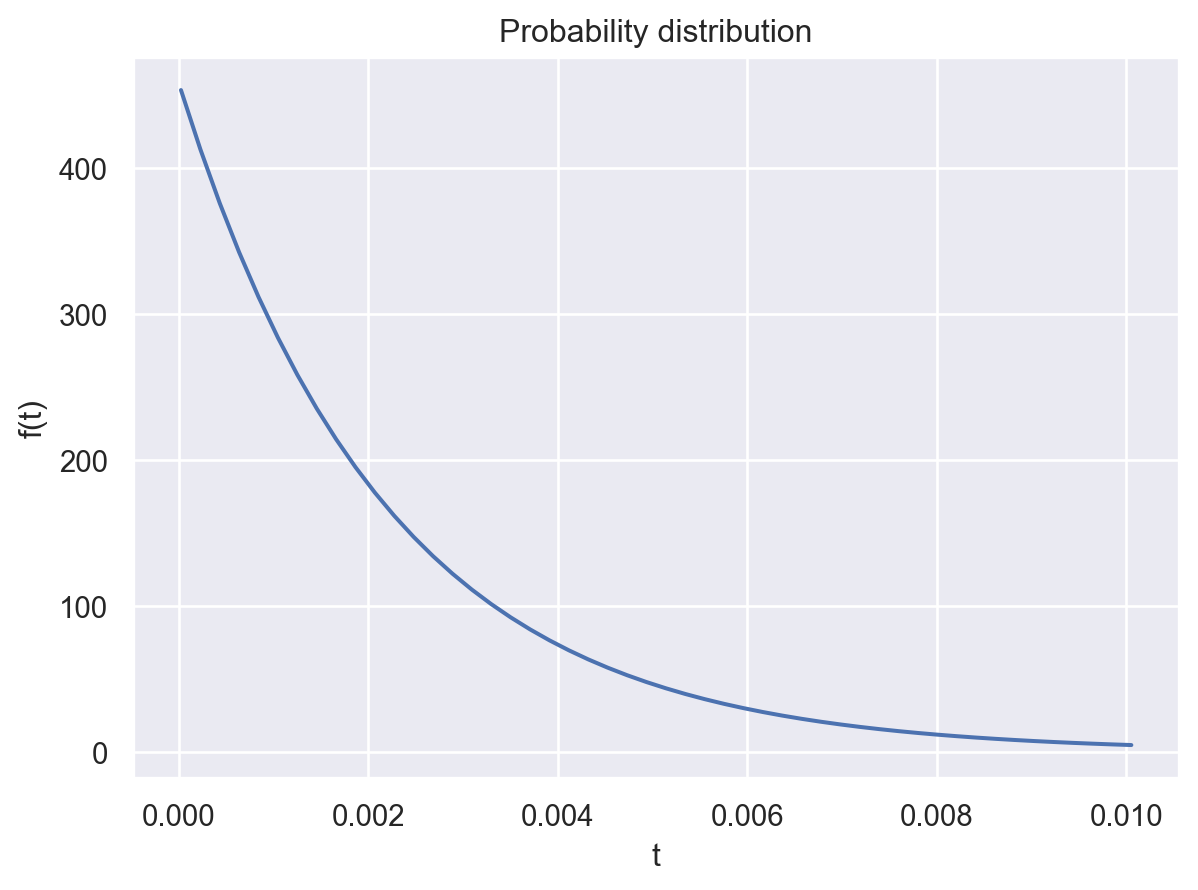

In [8]:
plot_waiting_time(impulses.waiting_time())

**(a)**
Return the probability that not more than one nerve impulse occurs in an interval of 1/100 second.

In [9]:
impulses.n_events(0.01).cdf(1)

0.0572

**(b)**
Return the probability that the interval between two successive impulses is less than 1/1000 second.

In [10]:
impulses.waiting_time().cdf(0.001)

0.3675

### 2. Major earthquakes

*M343 Book 2, Activity 3.2*

Initialise *earthquakes*, `Events`, a Poisson process model for the incidence of major earthquakes worldwide.

In [11]:
earthquakes = pp.Events(12/14)  # per year

Plot the probability distribution for the number of earthquakes expected in 10 years.

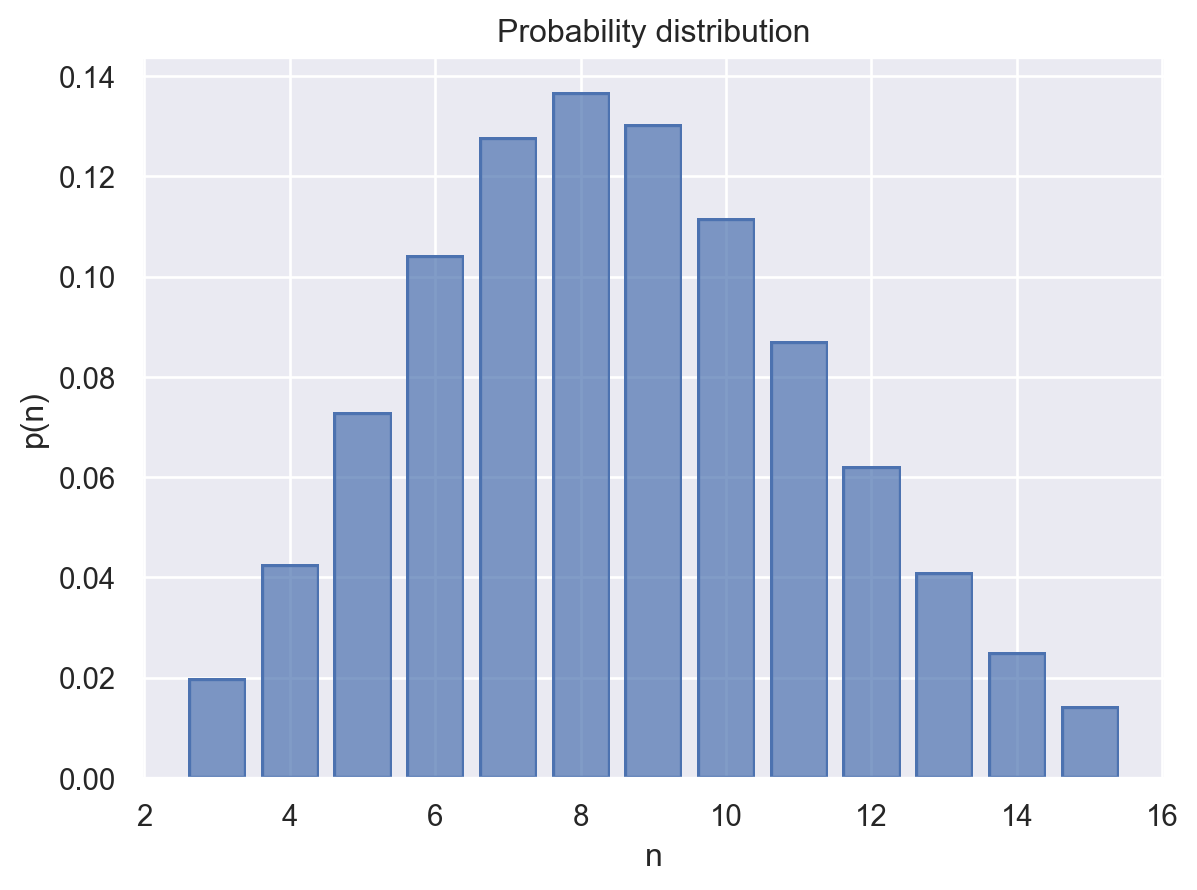

In [12]:
plot_n_events(earthquakes.n_events(10))

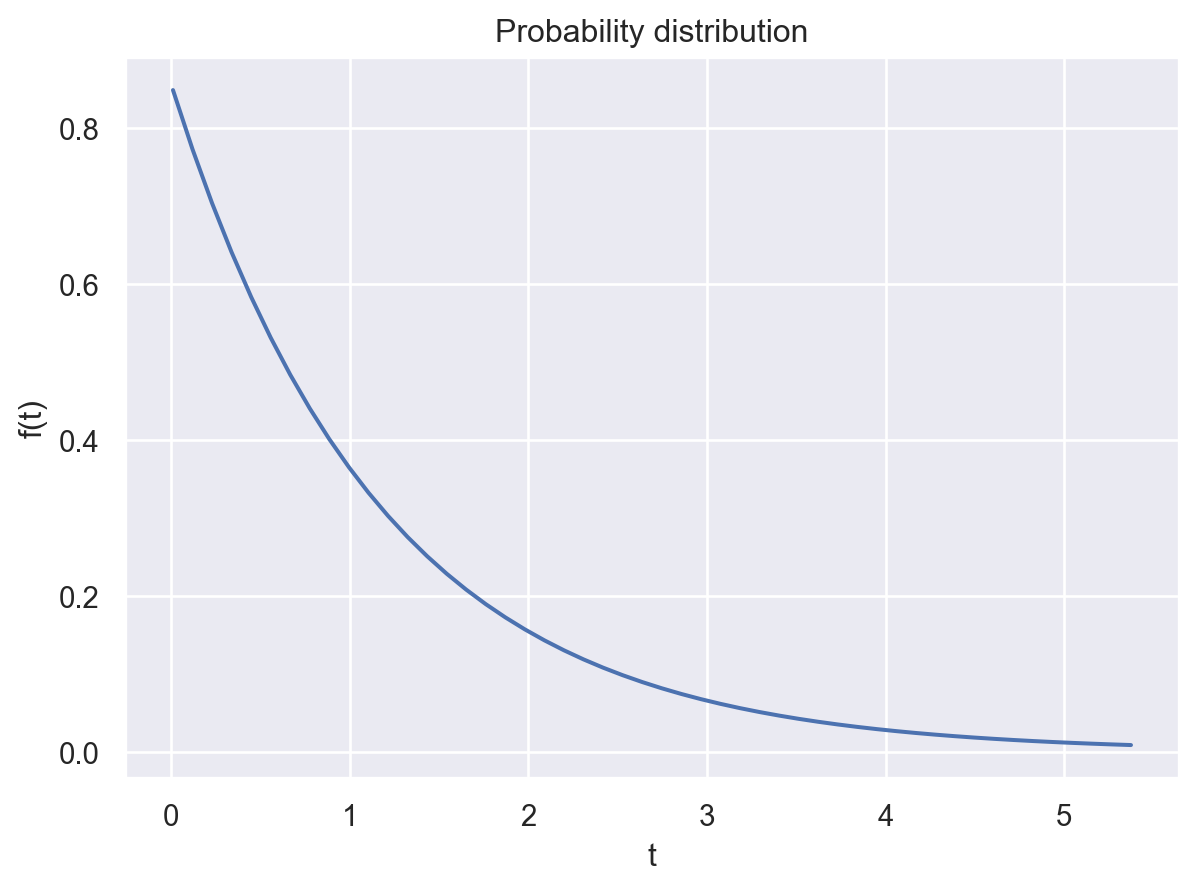

In [13]:
plot_waiting_time(earthquakes.waiting_time())

**(a)**
Return the probability that there will be at least three major earthquakes in a period of ten years.

In [14]:
earthquakes.n_events(1).sf(2)

0.0560

**(b)**
Return the probability that the waiting time between successive major earthquakes exceeds two years.

In [15]:
earthquakes.waiting_time().sf(0.001)

0.9991

## Multivariate Poisson process

### 1. Telephone calls

*M343 Book 2, Activity 5.2*

Initialise *caller_rates*, `dict`, a dictionary that maps the different kinds of people who call the tutor during the evening to their expected hourly rate.

In [16]:
caller_rates = {'student': 2/3,
                'family': 1/3,
                'friend': 1}

Initialise *phone_calls*, `MultivariateEvents`, a multivariate Poisson process that models the arrival rate of the different kinds of call over the course of an evening.

In [17]:
phone_calls = pp.MultivariateEvents(caller_rates)

**(a)**
Return probability that between 7pm and 9pm tomorrow evening, the tutor’s telephone will not ring.

In [18]:
phone_calls[:].n_events(2).pmf(0)

0.0183

**(b)**
Return the probability that the first call after 9pm is from a student.

In [19]:
phone_calls.props['student']

0.3333

**(c)**
Return the probability that exactly two of the calls are from members of her family, given that the tutor receives four telephone calls one evening.

In [20]:
phone_calls.n_kind(4, 'family').pmf(2)

0.1157

**(side question)**
If one evening the tutor receives 18 calls, plot the the distribution of the number of calls expected to be the tutor's family.

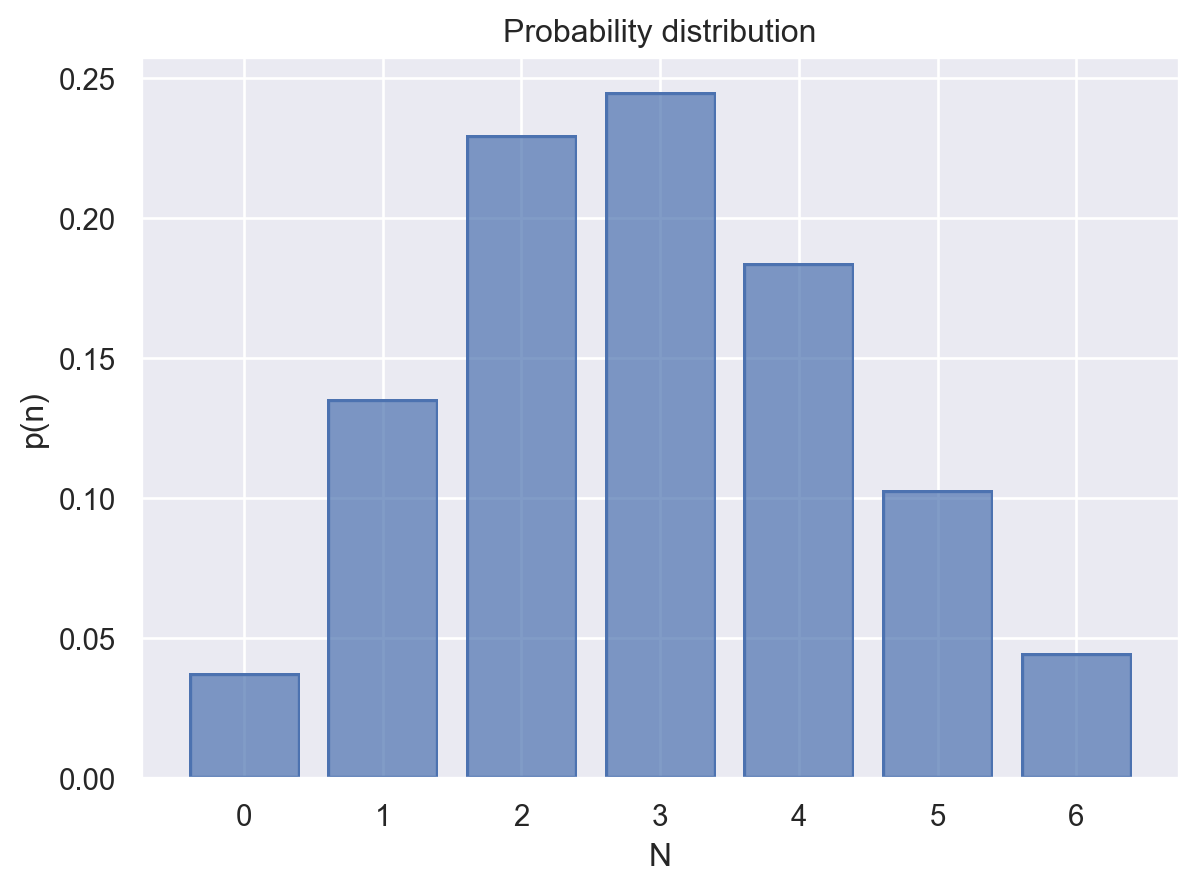

In [21]:
n_family = phone_calls.n_kind(18, 'family')
_xs = np.arange(n_family.ppf(0.01), n_family.ppf(0.99), dtype=int)
(
    so.Plot(x=_xs, y=n_family.pmf(_xs))
    .add(so.Bar())
    .label(title='Probability distribution',
           x='N',
           y='p(n)')
)

### 2. Bank customers

*M343 Book 2, Activity 5.1*

Initialise *bank_customers_props*, `dict`, a dictionary that maps a kind of customer that uses the bank to their proportion of all kind of customers.

In [22]:
bank_customer_props = {'A': 0.6, 'B': 0.3, 'C': 0.1}

Initialise *bank_customers*, `MultivariateEvents`, a multivariate Poisson process that models the arrival of the different kinds of customers at the bank over the course of one minute.

In [23]:
bank_customers = (
    pp.MultivariateEvents
    .from_props(bank_customer_props, aggregated_rate=10)
)

**(a)**
Return the probability that more than five customers arrive in an interval of length 30 seconds.

In [24]:
bank_customers[:].n_events(0.5).sf(5)

0.3840

**(b)**
Return the probability that six customers of type A arrive in one minute.

In [25]:
bank_customers['A'].n_events(1).pmf(6)

0.1606

**(c)**
Return the probability that six customers of type A, three of type B and at least one of type C arrive in one minute.

In [26]:
np.prod([bank_customers['A'].n_events(1).pmf(6),
         bank_customers['B'].n_events(1).pmf(3),
         bank_customers['C'].n_events(1).sf(0)])

0.0227

### 3. Post office customers

*M343 Book 2, Exercise 5.1*

Initialise *po_customer_props*, `dict`, a dictionary that maps a kind of customer that uses the post office to their proportion of all kind of customers.

In [27]:
po_customer_props = {'letters': 0.7,
                     'parcels': 0.05,
                     'other': 0.25}

Initialise *post_office*, `MultivariateEvents`, a multivariate Poisson process that models the arrival of different kinds of customers at the post office over the course of an hour.

In [28]:
post_office = pp.MultivariateEvents.from_props(po_customer_props, 8)

**(a)**
Return the rate at which customers arrive at the post office to post parcels.

In [29]:
post_office.rates['parcels']

0.4000

**(b)**
Return the probability that the interval between successive customers arriving to post parcels is greater than an hour.

In [30]:
post_office['parcels'].waiting_time().sf(1)

0.6703

**(c)**
Return the probability that over a three-hour period, fewer than five customers arrive to post letters.

In [31]:
post_office['letters'].n_events(3).cdf(4)

0.0002

Return the median waiting time between customers arriving to post something (either a letter or a parcel).

In [32]:
post_office['letters', 'parcels'].waiting_time().median()

0.1155

### 4. Library acquisitions

*M343 Book 2, Exercise 5.2*

Initialise *book_arrival_rates*, `dict`, a dictionary that maps a kind of book that is acquired by library to their acquisition rates over a week.

In [33]:
book_arrival_rates = {'fiction': 8,
                      'biographies': 1,
                      'reference': 0.25,
                      'non-text': 5}

Initialise *book_arrivals*, `MultivariateEvents`, a multivariate Poisson process that models the arrival of the different kinds of books at the library over the course of a week.

In [34]:
book_arrivals = pp.MultivariateEvents(book_arrival_rates)

**(a)**
Return the probability that at least two non-text acquisitions will arrive next week.

In [35]:
book_arrivals['non-text'].n_events(1).sf(1)

0.9596

**(b)**
Return the probability that no new work of fiction will arrive tomorrow.

In [36]:
book_arrivals['fiction'].n_events(1/7).pmf(0)

0.3189

**(c)**
Output the proportion of each new acquisition type.

In [37]:
book_arrivals.describe()

,rate,prop
kind,,
fiction,8.00,0.561404
biographies,1.00,0.070175
reference,0.25,0.017544
non-text,5.00,0.350877


## Non-homogeneous Poisson process

### 1. Errors in a maze

*M343 Book 2, Example 5.1*

Define the *maze_error_rate*, a function that describes the number of errors made by a rat learning its way around a maze in relation to time spent learning.

In [38]:
def maze_error_rate(t): return 8 * np.exp(-t)  # t >= 0

Initialise *learning_rat*, `NonHomogenousEvents`, a non-homogenous Poisson process that models the occurrence of errors by rats learning their way around a maze over time.

In [39]:
learning_rat = pp.NonHomogenousEvents(maze_error_rate)

Plot the interval rate between *t* = (0, 4).

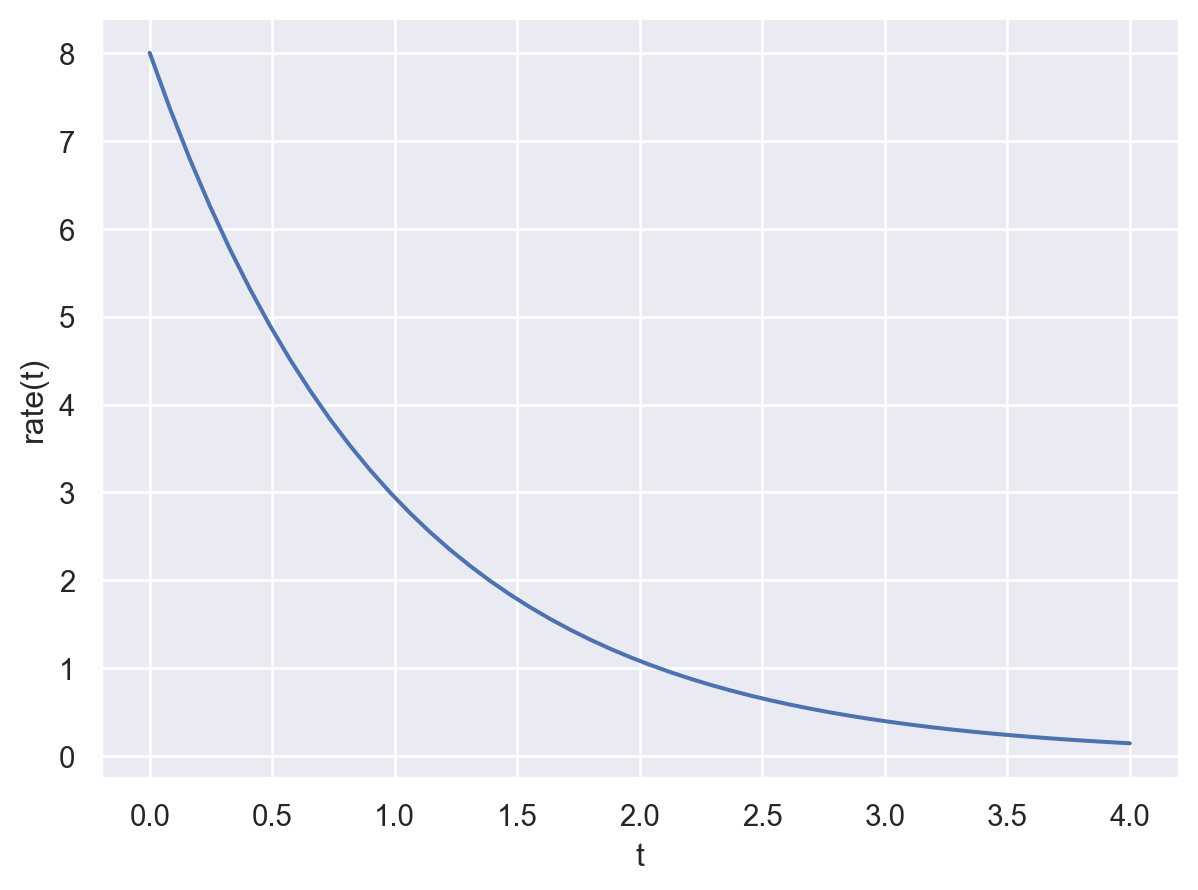

In [40]:
ts = np.linspace(0, 4)
rs = np.array([learning_rat.rate(t) for t in ts])
(
    so.Plot(x=ts, y=rs)
    .add(so.Line())
    .label(x='t', y='rate(t)')
)

Return the probability that the number of errors made by a rat in the second hour is more that two.

In [41]:
learning_rat.n_events(1, 2).sf(2)

0.2856

### 2. Learning to ride

*M343 Book 2, Activity 6.2*

Define *bike_accident rate*, a function that returns the rate of accidents made by a child learning to ride a bike at time *t*.

In [42]:
def bike_accident_rate(t): return 24 / (2 + t)  # t >= 0

Initialise *bike_accidents*, `NonHomogenousEvents`, a non-homogenous Poisson process that models the occurrence of bike accidents by a child over time.

In [43]:
bike_accidents = pp.NonHomogenousEvents(bike_accident_rate)

**(a)**
Return the expected number of accidents during the first week.

In [44]:
bike_accidents.n_events(0, 7).mean()

36.0979

**(b.i)**
Return the expected number of accidents in the third week.

In [45]:
bike_accidents.n_events(14, 21).mean()

8.7097

**(b.ii)**
Return the probability that the girl has eight accidents in the third week.

In [46]:
bike_accidents.n_events(14, 21).pmf(8)

0.1355

**(c)**
Return the probability that the fourth week is free of accidents.

In [47]:
bike_accidents.n_events(21, 28).pmf(0)

0.0017

### 3. Event times

*M343 Book 2, Exercise 6.1*

Define *some_error_rate*, a function that returns the expected error rate at time *t*.

In [48]:
def some_error_rate(t): return (3/8) * (t ** 2) * (4 - t)  # 0 <= t <= 4

Initialise *some_events*, `NonHomogenousEvents`, a representation of the non-homogenous Poisson process that models the occurrence of errors at rate *some_error_rate*.

In [49]:
some_events = pp.NonHomogenousEvents(some_error_rate)

**(c)**
Return the expected number of errors between *t* = (1, 3).

In [50]:
some_events.n_events(1, 3).mean()

5.5000

**(d)**
Return the probability that more than two errors occur between *t* = (1, 3).

In [51]:
some_events.n_events(1, 3).sf(2)

0.9116

**(e)**
Given that two errors occur between *t* = (0, 1), return the probability that at least four errors occur in total (that is, between *t* = (0, 4)).

In [52]:
some_events.n_events(1, 4).sf(1)

0.9957